In [1]:
import pandas as pd
train = pd.read_csv('train.csv')

In [2]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

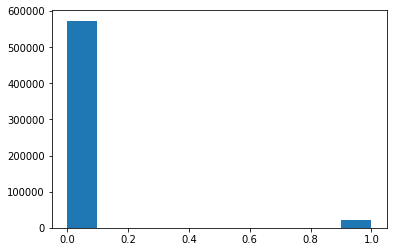

In [4]:
plt.hist(train.target)
plt.show()

In [5]:
sum(train.target==1)*1.0/len(train.target)

0.036447517859182946

In [6]:
import numpy as np
train = train.replace(-1, np.NaN)

In [7]:
train.isnull().any().any()

True

In [8]:
colstodrop = ['id',u'ps_car_03_cat',u'ps_reg_03',u'ps_car_05_cat']

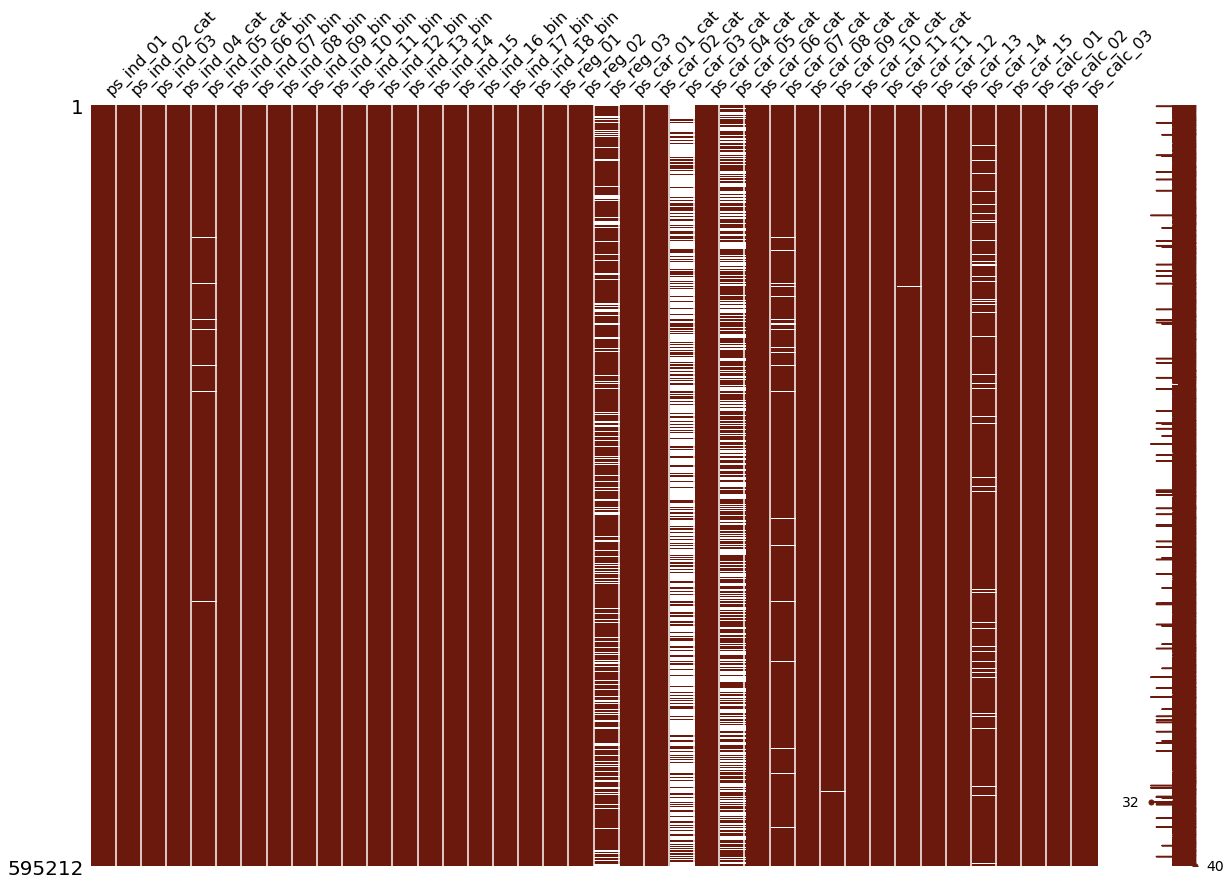

In [8]:
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=train.iloc[:,2:42], figsize=(20, 14), color=(0.42, 0.1, 0.05))

In [9]:
test = pd.read_csv(r'test.csv')

In [10]:
train = train.drop(colstodrop,axis=1)

In [11]:
print(train.shape)
train = train.dropna()
train.shape,test.shape

(595212, 55)


((541860, 55), (892816, 58))

In [12]:
testids = test['id']
test = test.drop(colstodrop,axis=1)
total = pd.concat([train,test],axis=0)

In [13]:
totalc = total.copy()
totalc.shape

(1434676, 55)

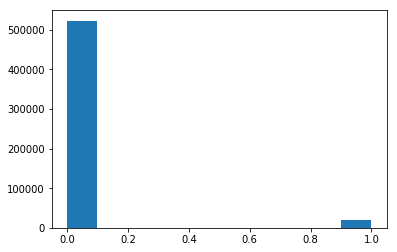

In [59]:
plt.hist(train.target)
plt.show()

In [ ]:
for col in train.columns:
        temp = pd.get_dummies(totalc[col])
        #print(temp.size)
        totalc = pd.concat([totalc,temp],axis=1)
        #break
        totalc.drop([col],inplace=True)

/home/khada004/.local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


MemoryError: 

In [23]:
totalc.head()

,id,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,...,0,1,0,1,0,1,0,1,0,1
0,7,0.6,0.5,0.2,3,1,10,1,10,1,...,0,1,0,1,1,0,1,0,0,1
1,9,0.3,0.1,0.3,2,1,9,5,8,1,...,0,1,0,1,1,0,0,1,1,0
2,13,0.5,0.7,0.1,2,2,9,1,8,2,...,0,1,0,1,1,0,0,1,1,0
3,16,0.6,0.9,0.1,2,4,7,1,8,4,...,1,0,1,0,1,0,1,0,1,0
4,17,0.4,0.6,0.0,2,2,6,3,10,2,...,1,0,1,0,0,1,0,1,1,0


In [24]:
train2 = totalc[:len(train)]
test2 = totalc[len(train):]

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
model = RandomForestClassifier(n_estimators=100,max_depth=6)

In [36]:
train.columns

Index([u'id', u'target', u'ps_ind_01', u'ps_ind_02_cat', u'ps_ind_03',
       u'ps_ind_04_cat', u'ps_ind_05_cat', u'ps_ind_06_bin', u'ps_ind_07_bin',
       u'ps_ind_08_bin', u'ps_ind_09_bin', u'ps_ind_10_bin', u'ps_ind_11_bin',
       u'ps_ind_12_bin', u'ps_ind_13_bin', u'ps_ind_14', u'ps_ind_15',
       u'ps_ind_16_bin', u'ps_ind_17_bin', u'ps_ind_18_bin', u'ps_reg_01',
       u'ps_reg_02', u'ps_reg_03', u'ps_car_01_cat', u'ps_car_02_cat',
       u'ps_car_03_cat', u'ps_car_04_cat', u'ps_car_05_cat', u'ps_car_06_cat',
       u'ps_car_07_cat', u'ps_car_08_cat', u'ps_car_09_cat', u'ps_car_10_cat',
       u'ps_car_11_cat', u'ps_car_11', u'ps_car_12', u'ps_car_13',
       u'ps_car_14', u'ps_car_15', u'ps_calc_01', u'ps_calc_02', u'ps_calc_03',
       u'ps_calc_04', u'ps_calc_05', u'ps_calc_06', u'ps_calc_07',
       u'ps_calc_08', u'ps_calc_09', u'ps_calc_10', u'ps_calc_11',
       u'ps_calc_12', u'ps_calc_13', u'ps_calc_14', u'ps_calc_15_bin',
       u'ps_calc_16_bin', u'ps_calc_17_bin',

In [37]:
colstodrop = [u'ps_car_03_cat',u'ps_reg_03',u'ps_car_05_cat']
train2 = train2.drop(colstodrop,axis=1)
train2 = train2.dropna()

In [40]:
train.isnull().any().any()

True

In [42]:
test.isnull().any().any()

False